<a href="https://colab.research.google.com/github/AybTGH/CRISP-DM/blob/main/CRISP_DM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import data
import pandas as pd
file = pd.read_csv('/content/drive/MyDrive/ML/vibration_dataset_light.csv',index_col=0)
file.head()

,pos,g,fftg,fftv,F,C
1,P1V,"[-0.16512878645751894, 0.04998307178737588, -0...","[0.0006586228415304686, 0.0008392442605411405,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2966064382657...",Normal,None
2,P1H,"[-0.042161579465260245, 0.021362479328271962, ...","[0.0006843542482240162, 0.0008895457854118105,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4527706580487...",Normal,None
3,P2V,"[-0.1349568120102025, 0.23669171459765884, 0.0...","[0.0006736708035253035, 0.0008349143002841891,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3385470510031...",Normal,None
4,P2A,"[0.12349800107774804, 0.25274141834206476, 0.2...","[0.0008922086829811786, 0.0012222498163517285,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5506433760599...",Normal,None
5,P1V,"[0.021572814759439424, 0.08107507627351192, 0....","[0.0003683865447006467, 0.00046141507219113866...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2025792082014...",Normal,None


In [2]:
file.shape

(1020, 6)

In [3]:
file.columns

Index(['pos', 'g', 'fftg', 'fftv', 'F', 'C'], dtype='object')

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 1 to 1020
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pos     1020 non-null   object
 1   g       1020 non-null   object
 2   fftg    1020 non-null   object
 3   fftv    1020 non-null   object
 4   F       1020 non-null   object
 5   C       1020 non-null   object
dtypes: object(6)
memory usage: 55.8+ KB


In [5]:
file['F'].unique()

array(['Normal', 'Bearing Lubrification Fault', 'Gear fault', 'Imbalance',
       'Mechanical looseness', 'Misalignment', 'Structural Fault'],
      dtype=object)

In [6]:
file['C'].unique()

array(['None', 'Lubrification', 'Gear', 'Rotor', 'Loosness', 'Link',
       'Frame'], dtype=object)

**Meaning of the columns**

> pos: Sensor positions in vibration-based condition monitoring.

> g: numeric informations about the waveform.

> FFT: Fourier analysis works by “testing” for the presence of each frequency component.  A discrete Fourier transform (DFT) multiplies the raw waveform by sine waves of discrete frequencies to determine if they match and what their corresponding amplitude and phase are.  A fast Fourier transform (FFT) is just a DFT using a more efficient algorithm that takes advantage of the symmetry in sine waves.  The FFT requires a signal length of some power of two for the transform and splits the process into cascading groups of 2 to exploit these symmetries.  This dramatically improves processing speed; if N is the length of the signal, a DFT needs N2 operations while a FFT needs N*log2(N).

> F: specifies the kind of abnormal state

> C: Mode to be checked





In [7]:
file.dtypes

pos     object
g       object
fftg    object
fftv    object
F       object
C       object
dtype: object

In [8]:
col = file[['g','fftg','fftv']]
col

,g,fftg,fftv
1,"[-0.16512878645751894, 0.04998307178737588, -0...","[0.0006586228415304686, 0.0008392442605411405,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2966064382657..."
2,"[-0.042161579465260245, 0.021362479328271962, ...","[0.0006843542482240162, 0.0008895457854118105,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4527706580487..."
3,"[-0.1349568120102025, 0.23669171459765884, 0.0...","[0.0006736708035253035, 0.0008349143002841891,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3385470510031..."
4,"[0.12349800107774804, 0.25274141834206476, 0.2...","[0.0008922086829811786, 0.0012222498163517285,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5506433760599..."
5,"[0.021572814759439424, 0.08107507627351192, 0....","[0.0003683865447006467, 0.00046141507219113866...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2025792082014..."
...,...,...,...
1016,"[-0.09399215470338836, -0.07581700666718469, -...","[0.0013470897256730337, 0.0021139789812571366,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3077497412413..."
1017,"[0.12178146241731114, 0.11189611167124339, 0.1...","[0.001384099028685586, 0.0021601822551360617, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2299074484300..."
1018,"[-0.14434849756242168, -0.12369798626506422, -...","[0.0013403005936539496, 0.002314003743353513, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2886976999185..."
1019,"[0.12246373280600302, -0.022959302450522835, 0...","[0.001419439714691728, 0.002208483168563792, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3068307509386..."


In [9]:
# transform the type of the tree columns to list so we can manipulate the numbers
import json 
def to_array(l):
  r = str(l).replace("'",'')
  data = json.loads(r)
  return data
file['g'] = file['g'].apply(to_array)
file['fftg'] = file['fftg'].apply(to_array)
file['fftv'] = file['fftv'].apply(to_array)


In [10]:
file.head()

,pos,g,fftg,fftv,F,C
1,P1V,"[-0.16512878645751894, 0.04998307178737588, -0...","[0.0006586228415304686, 0.0008392442605411405,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2966064382657...",Normal,None
2,P1H,"[-0.042161579465260245, 0.021362479328271962, ...","[0.0006843542482240162, 0.0008895457854118105,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4527706580487...",Normal,None
3,P2V,"[-0.1349568120102025, 0.23669171459765884, 0.0...","[0.0006736708035253035, 0.0008349143002841891,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3385470510031...",Normal,None
4,P2A,"[0.12349800107774804, 0.25274141834206476, 0.2...","[0.0008922086829811786, 0.0012222498163517285,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5506433760599...",Normal,None
5,P1V,"[0.021572814759439424, 0.08107507627351192, 0....","[0.0003683865447006467, 0.00046141507219113866...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2025792082014...",Normal,None


In [11]:
g=file['g'][1]
fftg = file['fftg'][1]
fftv=file['fftv'][1]
len(g),len(fftg),len(fftv)

(160000, 3200, 3200)

In [12]:
N = len(g)
N

160000

(0.0, 1000.0, 0.0, 0.4)

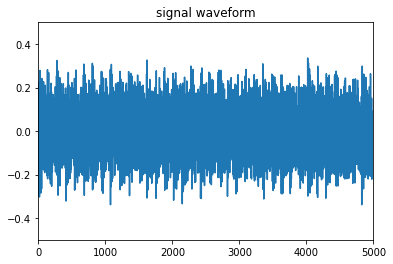

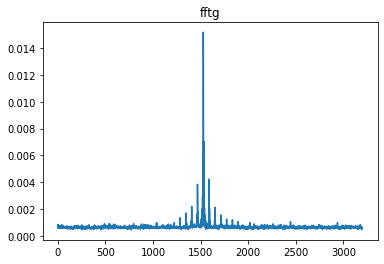

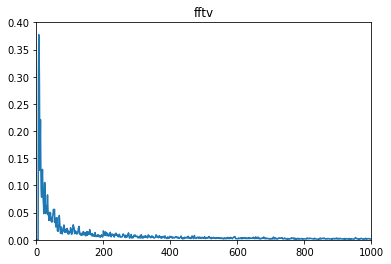

In [13]:
#example of visualization of a normal signal
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(g)
plt.axis([0,5000, -0.5, 0.5])
plt.title('signal waveform')
plt.figure(2)
plt.plot(fftg)
plt.title('fftg')
plt.figure(3)
plt.plot(fftv)
plt.title('fftv')
plt.axis([0,1000, 0, 0.4])

## calculation of indicators 

In [14]:
import numpy as np
def fun(l): return np.sqrt(sum(np.square(l)/N))
file['NGV']=file['fftv'].apply(fun)
file['NGA']=file['fftg'].apply(fun)
file.head()

,pos,g,fftg,fftv,F,C,NGV,NGA
1,P1V,"[-0.16512878645751894, 0.04998307178737588, -0...","[0.0006586228415304686, 0.0008392442605411405,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2966064382657...",Normal,None,0.002214,0.000112
2,P1H,"[-0.042161579465260245, 0.021362479328271962, ...","[0.0006843542482240162, 0.0008895457854118105,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4527706580487...",Normal,None,0.002765,0.000108
3,P2V,"[-0.1349568120102025, 0.23669171459765884, 0.0...","[0.0006736708035253035, 0.0008349143002841891,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3385470510031...",Normal,None,0.002061,0.000096
4,P2A,"[0.12349800107774804, 0.25274141834206476, 0.2...","[0.0008922086829811786, 0.0012222498163517285,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5506433760599...",Normal,None,0.002520,0.000127
5,P1V,"[0.021572814759439424, 0.08107507627351192, 0....","[0.0003683865447006467, 0.00046141507219113866...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2025792082014...",Normal,None,0.001084,0.000057


In [15]:
file['pos'].isna().sum()

0

The column pos refer to the position of the sensors, in some applications it's from the requiered features to know the source of the measure. we can use a Ml model to predict the pos based on the signal informations, fftg and fftv.

# Modeling


* Modele choisi : KNN
* Features : NGV and NGA
*   Target : Failure mode classification




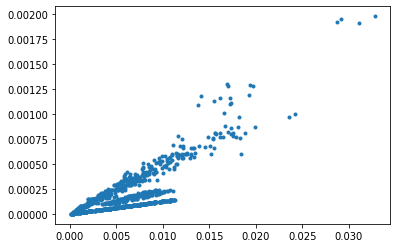

In [17]:
plt.scatter(file['NGV'],file['NGA'],marker='.')

In [18]:
X = file[['NGV','NGA']].values
X[0:5]

array([[2.21397394e-03, 1.11535359e-04],
       [2.76458266e-03, 1.07529643e-04],
       [2.06113499e-03, 9.64392631e-05],
       [2.52048384e-03, 1.26985113e-04],
       [1.08431802e-03, 5.67306974e-05]])

In [19]:
# Function to convert  
def listToString(s): 
    str1 = ""  
    for ele in s: 
        str1 += ele   
    return str1   
file['F']= file['F'].apply(listToString)
file['F'].values

array(['Normal', 'Normal', 'Normal', ..., 'Structural Fault',
       'Structural Fault', 'Structural Fault'], dtype=object)

In [20]:
dic = {}
for i in range(1,8): dic[file['F'].unique()[i-1]]= i
dic

{'Bearing Lubrification Fault': 2,
 'Gear fault': 3,
 'Imbalance': 4,
 'Mechanical looseness': 5,
 'Misalignment': 6,
 'Normal': 1,
 'Structural Fault': 7}

In [21]:
def cor(x): return dic[x]
file['New_F']  = file['F'].apply(cor)
file.head()

,pos,g,fftg,fftv,F,C,NGV,NGA,New_F
1,P1V,"[-0.16512878645751894, 0.04998307178737588, -0...","[0.0006586228415304686, 0.0008392442605411405,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2966064382657...",Normal,None,0.002214,0.000112,1
2,P1H,"[-0.042161579465260245, 0.021362479328271962, ...","[0.0006843542482240162, 0.0008895457854118105,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4527706580487...",Normal,None,0.002765,0.000108,1
3,P2V,"[-0.1349568120102025, 0.23669171459765884, 0.0...","[0.0006736708035253035, 0.0008349143002841891,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3385470510031...",Normal,None,0.002061,0.000096,1
4,P2A,"[0.12349800107774804, 0.25274141834206476, 0.2...","[0.0008922086829811786, 0.0012222498163517285,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5506433760599...",Normal,None,0.002520,0.000127,1
5,P1V,"[0.021572814759439424, 0.08107507627351192, 0....","[0.0003683865447006467, 0.00046141507219113866...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2025792082014...",Normal,None,0.001084,0.000057,1


In [22]:
y = file['New_F'].values

**Normalize** **Data**

In [23]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.96812392, -0.3833068 ],
       [-0.83371241, -0.40039589],
       [-1.0054341 , -0.44770939],
       [-0.89330044, -0.31739545],
       [-1.24388915, -0.61711308]])

**Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (816, 2) (816,)
Test set: (204, 2) (204,)


**KNN implementation**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

**Predicting**

In [27]:
yhat = neigh.predict(X_test)
print(yhat[0:30])
print(y_test[0:30])

[1 5 4 1 1 3 1 6 1 5 1 1 1 1 1 6 5 1 6 7 1 7 1 7 1 1 1 6 1 5]
[1 5 4 1 1 3 1 6 1 2 1 1 1 1 1 6 5 1 6 7 1 4 1 7 1 1 1 6 1 5]


In [28]:
file['Pred_F'] = neigh.predict(X)
dct = {v: k for k, v in dic.items()}
file['Pred_F'] = file['Pred_F'].apply(lambda x: dct[x])
file.head()

,pos,g,fftg,fftv,F,C,NGV,NGA,New_F,Pred_F
1,P1V,"[-0.16512878645751894, 0.04998307178737588, -0...","[0.0006586228415304686, 0.0008392442605411405,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2966064382657...",Normal,None,0.002214,0.000112,1,Normal
2,P1H,"[-0.042161579465260245, 0.021362479328271962, ...","[0.0006843542482240162, 0.0008895457854118105,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4527706580487...",Normal,None,0.002765,0.000108,1,Normal
3,P2V,"[-0.1349568120102025, 0.23669171459765884, 0.0...","[0.0006736708035253035, 0.0008349143002841891,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3385470510031...",Normal,None,0.002061,0.000096,1,Normal
4,P2A,"[0.12349800107774804, 0.25274141834206476, 0.2...","[0.0008922086829811786, 0.0012222498163517285,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5506433760599...",Normal,None,0.002520,0.000127,1,Normal
5,P1V,"[0.021572814759439424, 0.08107507627351192, 0....","[0.0003683865447006467, 0.00046141507219113866...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2025792082014...",Normal,None,0.001084,0.000057,1,Normal


**Accuracy evaluation**

In [29]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9473039215686274
Test set Accuracy:  0.9362745098039216


## Here is how i choosed the k: 

We can calculate the accuracy of KNN for different values of k.

In [30]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.89705882, 0.89705882, 0.93627451, 0.93627451, 0.93137255,
       0.91176471, 0.92156863, 0.91666667, 0.92156863])

Plot the model accuracy for a different number of neighbors.

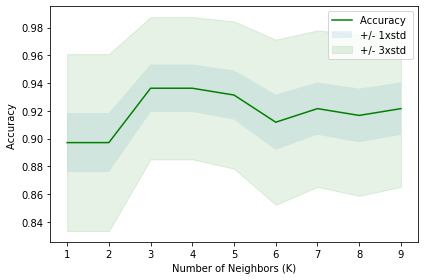

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9362745098039216 with k= 3
